# Task 1 — Tensor Mechanics (3pts)

## Part A — Basic Operations
### 1. Create tensors:
- zeros
- ones
- random normal
- random uniform

In [102]:
import torch
import numpy as np

torch.manual_seed(0)

zeros = torch.zeros(10)
print(f"Zeros: {zeros}")

ones = torch.ones(10)
print(f"Ones: {ones}")

rand_uniform = torch.rand(10)
print(f"Random uniform: {rand_uniform}")

rand_normal = torch.normal(mean=0.,std=1.,size=(1,10)) #there is randn which results in the same distribution as normal(mean=0.,std=1.,...)
print(f"Random normal: {rand_normal}")

Zeros: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Ones: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Random uniform: tensor([0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964, 0.4556,
        0.6323])
Random normal: tensor([[ 0.1604, -0.6065, -0.7831,  1.0622, -0.2613,  1.0667,  0.4159,  0.8396,
         -0.8265, -0.7949]])


### 2. Perform and demonstrate:
- elementwise multiplication
- matrix multiplication
- broadcasting
- reshaping
- transpose
- concatenation

In [3]:
a = torch.tensor([[1, 2],[3, 4]])

b = torch.tensor([[5, 6],[7, 8]])

elementwise = a * b
print(f"Elementwise Multiplication:\n {elementwise}")

matrix_mult = torch.matmul(a,b)
print(f"Matrix mult:\n {matrix_mult}")


Elementwise Multiplication:
 tensor([[ 5, 12],
        [21, 32]])
Matrix mult:
 tensor([[19, 22],
        [43, 50]])


Elementwise multiplication multiplies the numbers on matching positions in a tensor:
$$
∀_{i,j} C[i,j] = A[i,j] * B[i,j] 
$$

Matrix multiplication follows the standard formula:
$$
∀_{i,j} C[i,j] = \displaystyle\sum_{k=1}^n A[i,k] * B[k,j]
$$

In [4]:
x = torch.tensor([[1, 2, 3],[4, 5, 6]])

braodcasting = x + 2
print(f"Braodcasting:\n {braodcasting}")


Braodcasting:
 tensor([[3, 4, 5],
        [6, 7, 8]])


**Two tensors are “broadcastable” if the following rules hold**:

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

**If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows**:

- If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.

- Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

In [5]:

alpha = torch.arange(6)
alpha_reshaped = alpha.reshape((2,3))

print(f"Alpha:\n {alpha}")
print(f"Alpha reshaped:\n {alpha_reshaped}")

Alpha:
 tensor([0, 1, 2, 3, 4, 5])
Alpha reshaped:
 tensor([[0, 1, 2],
        [3, 4, 5]])


In [6]:
beta = torch.tensor([[1, 2, 3],[4, 5, 6]])

print("Original shape:", beta.shape)
print("Transposed:\n", beta.T)
print("New shape:", beta.T.shape)

Original shape: torch.Size([2, 3])
Transposed:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])
New shape: torch.Size([3, 2])


In [7]:
matrixA = torch.tensor([[1,2,3], [4,5,6]])
matrixB = torch.tensor([[1,1,1], [1,1,1]])

matrixC = torch.concat([matrixA,matrixB],dim=1) # 1 for concatenating row + row, 0 for columns + columns

print(f"Concatenated: {matrixC}")

Concatenated: tensor([[1, 2, 3, 1, 1, 1],
        [4, 5, 6, 1, 1, 1]])


### 3. Show examples of incorrect shape operations and explain why they fail.

In [8]:
a = torch.ones((2,3))
b = torch.ones((3,3))

torch.cat([a, b], dim=1)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 2 but got size 3 for tensor number 1 in the list.

## Part B — Manual Linear Algebra
### Implement manually (without using torch.matmul for part of it):
- Dot product
- Matrix-vector multiplication
- Batch matrix multiplication

Then verify correctness using built-in PyTorch functions.

In [58]:
def dot(vector1: torch.tensor, vector2: torch.tensor) -> torch.tensor:
    if vector1.dim() != 1 or vector2.dim() != 1:
        raise ValueError("Both tensors must be 1D.")
    if vector1.shape != vector2.shape:
        raise ValueError("Tensors must have same shape.")
    
    result = torch.tensor(0.0)
    for i in range(vector1.shape[0]):
        result += vector1[i] * vector2[i]
    return result

t1, t2 = torch.tensor([1,3,4,5]), torch.tensor([1,3,4,5])
print(dot(t1,t2))
print(torch.dot(t1,t2))
print(dot(t1,t2) == torch.dot(t1,t2))


tensor(51.)
tensor(51)
tensor(True)


In [ ]:
def matrix_mult(matrix: torch.tensor, vector: torch.tensor) -> torch.tensor:
    if matrix.dim() != 2 or vector.dim() != 1:
        raise ValueError("Matrix must be 2D and vector must be 1D.")
    if matrix.shape[1] != vector.shape[0]:
        raise ValueError("Inner dimensions must match.")

    m, n = matrix.shape
    result = torch.zeros(m)

    for i in range(m):
        for j in range(n):
            result[i] += matrix[i, j] * vector[j]

    return result
    

t1, t2 = torch.tensor([[1,3,4.5,5],[1,2,3.5,4]]), torch.tensor([1,3,4.5,5])

manual = matrix_mult(t1,t2)
torch_impl = torch.mv(t1,t2)

print(f"Manual: {manual}")
print(f"Torch: {torch_impl}")
print(all(manual == torch_impl))

Manual: tensor([55.2500, 42.7500])
Torch: tensor([55.2500, 42.7500])
True


In [63]:

def batch_matrix_mult(matrix1: torch.Tensor, matrix2: torch.Tensor) -> torch.Tensor:
    if matrix1.dim() != 3 or matrix2.dim() != 3:
        raise ValueError("Both inputs must be 3D tensors.")
    
    if matrix1.shape[0] != matrix2.shape[0]:
        raise ValueError("Batch sizes must match.")
    
    if matrix1.shape[2] != matrix2.shape[1]:
        raise ValueError("Inner matrix dimensions must match.")
    
    batch, m, n = matrix1.shape
    _, _, p = matrix2.shape
    
    result = torch.zeros(batch, m, p)

    for b in range(batch):
        for i in range(m):
            for j in range(p):
                for k in range(n):
                    result[b, i, j] += matrix1[b, i, k] * matrix2[b, k, j]
    
    return result

t1 = torch.randn(2, 3, 4)
t2 = torch.randn(2, 4, 5)

manual_result = batch_matrix_mult(t1, t2)
torch_result = torch.bmm(t1, t2)
print(f"Manual: {manual_result}")
print(f"Torch: {torch_result}")
print(manual_result == torch_result)

Manual: tensor([[[-4.6239, -2.9156, -5.1384, -2.2897, -0.1302],
         [-0.5606,  1.3111, -2.5536, -0.5736,  3.1311],
         [-2.5993, -2.8268, -0.7861, -1.8169,  0.3212]],

        [[ 3.4770, -5.1767, -0.6195,  2.6947,  2.0388],
         [-0.7446, -5.2466, -2.5666, -2.7989, -2.7214],
         [ 1.2129,  2.8150, -0.8451,  0.3148,  2.0858]]])
Torch: tensor([[[-4.6239, -2.9156, -5.1384, -2.2897, -0.1302],
         [-0.5606,  1.3111, -2.5536, -0.5736,  3.1311],
         [-2.5993, -2.8268, -0.7861, -1.8169,  0.3212]],

        [[ 3.4770, -5.1767, -0.6195,  2.6947,  2.0388],
         [-0.7446, -5.2466, -2.5666, -2.7989, -2.7214],
         [ 1.2129,  2.8150, -0.8451,  0.3148,  2.0858]]])
tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]])


# Task 2 — Simple Linear Model (Forward Pass Only) (3pts)
We consider the model:
$$
y = Wx+b
$$

Requirements:
Generate synthetic dataset:
- 100 data points
- 1D input → 1D output
- Add small Gaussian noise

Initialize:
- W randomly
- b randomly

Compute:
- Predictions
- Mean Squared Error manually

Plot:
- Data points
- Model predictions

Important Restrictions:
- No torch.nn.Linear

Required Explanation:
- What does the weight represent geometrically?
- What does the bias represent?
- Why does random initialization produce poor predictions?

Weight represents the slope of the functio, bias is the intercept (vertical shift).

Because random predictions have nothing to do with our data points?

In [5]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

n = 100
x = torch.linspace(-10, 10, n)
noise = torch.randn(size=(1,100))

y = 0.21 * x + noise

W = torch.randn(1)
b = torch.randn(1)

y_pred = W * x + b


mse = torch.mean((y_pred - y) ** 2)

print("Initialized W:", W.item())
print("Initialized b:", b.item())
print("Mean Squared Error:", mse.item())

Initialized W: 1.3232016563415527
Initialized b: 0.037114303559064865
Mean Squared Error: 43.20132827758789


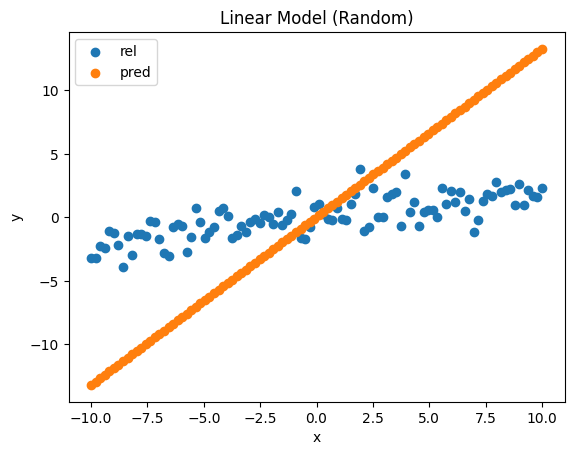

In [110]:
plt.figure()
plt.scatter(x, y, label="rel")
plt.scatter(x, y_pred, label="pred")
plt.title("Linear Model (Random)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Task 3 — Pretrained Model Inference (4pts)

In [2]:
from torchvision.models import resnet18, ResNet18_Weights
from torchvision import transforms
import torch
from PIL import Image
import requests

model = resnet18(weights=ResNet18_Weights.DEFAULT)

model.eval()

image_files = ["oli.png", "lougo.png", "klosiej.png", "cat2.png", "cat3.png", "dog.png" ]

images = []
for file in image_files:
    img = Image.open(file).convert("RGB")
    images.append(img)

We call model.eval() to switch the model from training mode to evaluation mode. I disables dropout and batch normalization which would make our inference unstable.

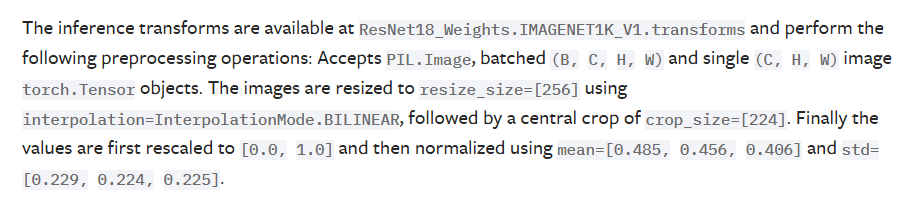

In [3]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

transform_no_normalization = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

If normalization is skipped, the data will have a different scale which will create nonsensical predictions, as the pretrained weights of this model were calculated using normalized data. In short the model expects the prediction data to have the same distribution as the data it was trained on.

In [ ]:
labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = requests.get(labels_url).text.splitlines()

Logits interpreted to be the unnormalised (or not-yet normalised) predictions (or outputs) of a model. 

Normally, the model generates an unbounded real number that is then "squashed" into the (0,1)
range with .... function (depends on the type of classification). The unbounded real number (i.e. the unnormalized log-probability) is the logit.

^^^^^
https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean ^^^^^

We apply softmax to multiclass classification to normalize the logits, so that they sum up to 1. Softmax doesn't change the order of logits so the class with the highest raw output will still be the predicted class, but it allows us to better interpret the predictions and see the confidence of the model. (it normalizes the scores to (0,1), so we dont have to deal with negative values too)


In [5]:
for idx, img in enumerate(images):
    
    input_tensor = transform(img).unsqueeze(0)
    
    with torch.no_grad():
        logits = model(input_tensor)
        probs = torch.softmax(logits, dim=1)
    
    top5_probs, top5_indices = torch.topk(probs, 5)
    
    print(f"\nImage: {image_files[idx]}")
    
    for i in range(5):
        class_name = labels[top5_indices[0][i]]
        probability = top5_probs[0][i].item()
        print(f"  {class_name}: {probability:.4f}")


Image: oli.png
  proboscis monkey: 0.1378
  orangutan: 0.1322
  langur: 0.0584
  mask: 0.0515
  wig: 0.0468

Image: lougo.png
  candle: 0.0403
  bow tie: 0.0368
  Band Aid: 0.0240
  oboe: 0.0211
  maraca: 0.0178

Image: klosiej.png
  dalmatian: 0.7549
  gazelle: 0.0916
  Great Dane: 0.0205
  Italian greyhound: 0.0107
  basenji: 0.0063

Image: cat2.png
  Egyptian cat: 0.3294
  Siamese cat: 0.1617
  ocarina: 0.0639
  Angora: 0.0483
  Siberian husky: 0.0165

Image: cat3.png
  window screen: 0.1367
  Siamese cat: 0.1101
  lynx: 0.1062
  tabby: 0.1020
  Persian cat: 0.0862

Image: dog.png
  Labrador retriever: 0.6168
  German short-haired pointer: 0.1559
  Rottweiler: 0.0946
  Chesapeake Bay retriever: 0.0503
  vizsla: 0.0327


In [6]:
for idx, img in enumerate(images):
    
    input = transform_no_normalization(img).unsqueeze(0)
    
    with torch.no_grad():
        logits = model(input)
        probs = torch.softmax(logits, dim=1)
    
    top5_probs, top5_indices = torch.topk(probs, 5)
    
    print(f"\nImage: {image_files[idx]}")
    
    for i in range(5):
        class_name = labels[top5_indices[0][i]]
        probability = top5_probs[0][i].item()
        print(f"  {class_name}: {probability:.4f}")


Image: oli.png
  nematode: 0.1688
  black grouse: 0.0534
  isopod: 0.0486
  tick: 0.0310
  barn spider: 0.0220

Image: lougo.png
  tub: 0.0217
  nipple: 0.0171
  loupe: 0.0164
  bathtub: 0.0160
  goblet: 0.0149

Image: klosiej.png
  piggy bank: 0.1090
  washbasin: 0.0711
  nematode: 0.0508
  nipple: 0.0434
  pitcher: 0.0409

Image: cat2.png
  piggy bank: 0.2288
  can opener: 0.0688
  wood rabbit: 0.0550
  Siamese cat: 0.0546
  bow tie: 0.0377

Image: cat3.png
  Siamese cat: 0.0797
  tabby: 0.0742
  shower curtain: 0.0680
  bow tie: 0.0567
  tiger cat: 0.0508

Image: dog.png
  Labrador retriever: 0.6393
  vizsla: 0.1037
  Chesapeake Bay retriever: 0.0875
  Weimaraner: 0.0516
  German short-haired pointer: 0.0307
